In [1]:
%load_ext autoreload
%autoreload 2


# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score
from tqdm import tqdm
import scipy.cluster.hierarchy as sch

from utils import *



In [2]:
# Dataset
genedata = pd.read_csv("genedata.csv")
genedata.head()

,id,class,f1,f2,f3,f4,f5,f6,f7,f8,...,f6991,f6992,f6993,f6994,f6995,f6996,f6997,f6998,f6999,f7000
0,1,5,2.3383,10.5440,11.4653,10.4441,10.6311,7.7036,9.6444,7.8501,...,11.9394,11.1349,5.7066,8.2176,9.9062,9.0815,10.5098,11.8648,8.4341,6.7618
1,2,4,3.9151,9.5815,10.3992,9.8333,8.9781,7.0265,9.2761,7.3903,...,11.6547,7.7178,9.3558,7.5026,10.2106,8.9278,10.2466,11.3329,7.8209,7.4350
2,3,5,2.9322,9.3102,11.0756,9.8490,9.4291,8.0618,8.3874,7.9274,...,11.9372,11.2369,6.5860,9.1668,10.3315,9.7551,11.4392,10.7036,8.0041,8.5380
3,4,5,3.9470,8.5315,10.9836,9.3676,9.6856,7.5842,8.5774,8.3737,...,13.2541,11.8221,9.5261,7.4231,11.2862,9.8992,10.4067,11.9044,7.9843,8.5370
4,5,1,4.4618,9.1392,10.9183,10.0490,9.8290,6.5658,9.8122,9.0646,...,11.6416,11.5142,6.5539,7.8319,11.0100,10.1013,11.2682,10.8969,8.1959,8.2906


## Feature analysis

In [79]:
# check for missing values
genedata.isnull().sum().sum()

0

In [80]:
# check datatype of features
dtypes = [genedata[col].dtypes for col in genedata.columns[2:]]
set(dtypes)   

{dtype('float64')}

## Preprocessing

### Data dimension reduction

We can use Principal Component Analysis to reduce the dimensionality of the data while still keeping most of the variance of the original data.

PCA works by creating an eigendecomposition of the data matrix and transforming the data using the first k eigenvectors corresponding to the largest eigenvalues. 

In [3]:
datasets = ['zscore', 'minmax', 'mean']
genedatas_reduced_pca = [preprocess(genedata, method, reduce_method='pca', idx_cols=2) for method in tqdm(datasets)]
genedatas_reduced_umap = [preprocess(genedata, method, reduce_method='umap', idx_cols=2) for method in tqdm(datasets)]

100%|██████████| 3/3 [00:37<00:00, 12.58s/it]


In [97]:
genedatas_reduced_pca[0].head()

,0,1,2,3,4,5,6,7,8,9,...,632,633,634,635,636,637,638,639,640,641
0,-70.048556,33.327316,40.461698,-2.166212,17.057492,19.150072,-4.633555,-13.168869,0.501396,-0.301397,...,-1.104453,-0.337533,-0.828522,-0.689054,0.482054,0.859760,-0.180250,-1.357643,0.722048,-1.525364
1,-10.464110,-8.634187,-42.093023,2.537004,-7.952857,19.872038,-12.412603,12.040182,-17.165775,-16.396432,...,-0.311394,-0.655669,0.451580,-0.486991,-0.174301,0.009449,0.209096,0.185768,-0.779198,-0.291434
2,-26.667443,-44.452219,17.505831,28.147876,18.006454,-0.920699,14.793595,17.457728,-27.081005,-1.556004,...,-0.040615,-0.127379,-0.022453,0.063337,-0.190984,-0.091717,0.257246,0.019292,0.222119,0.043728
3,-18.143237,-23.831043,38.560117,21.083171,9.840777,11.715306,-3.276121,9.021040,-13.001026,-5.470794,...,0.071035,-0.511806,1.216507,1.096372,-0.994640,-0.093628,-0.487304,0.339937,-0.298217,-0.581165
4,10.680205,-30.094230,12.698437,-15.858329,10.712456,-6.082771,-6.609089,-10.522580,2.376477,17.788999,...,0.533919,0.294388,-1.491704,-0.627755,-0.693207,-0.339348,0.049732,-0.036619,-0.478609,1.207248


In [83]:
# plot_hist(genedata_reduced)

## K-means clustering

100%|██████████| 12/12 [00:27<00:00,  2.31s/it]
0.8920051050041519


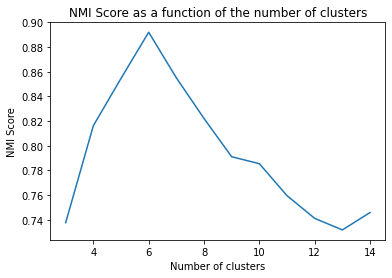

In [6]:
scores = []
n_clusters = range(3, 15)
truth = genedata['class'].values - 1
for k in tqdm(n_clusters):
    preds, km = kmeans(genedata[genedata.columns.values[2:]], k)
    score = nmi(truth, preds, k)
    scores.append(score)
plt.plot(n_clusters, scores)
plt.xlabel("Number of clusters")
plt.ylabel("NMI Score")
plt.title("NMI Score as a function of the number of clusters")
plt.savefig('plots/gene/kmeans_no_prep.png')
plt.show()

print(max(scores))

100%|██████████| 12/12 [00:03<00:00,  3.68it/s]


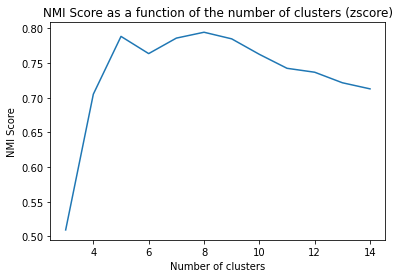

100%|██████████| 12/12 [00:03<00:00,  3.82it/s]


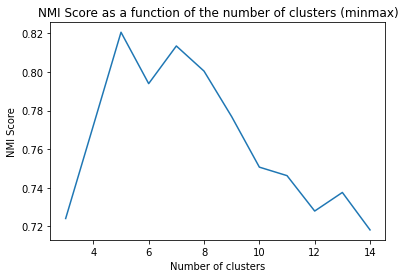

100%|██████████| 12/12 [00:03<00:00,  3.83it/s]


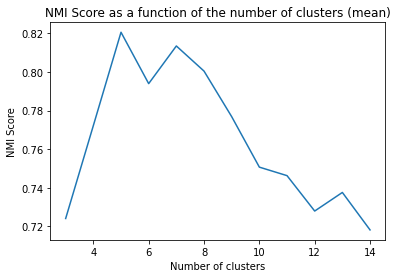

0.820537892466068


In [13]:
best_preds = []
best_score = 0

for genedata_reduced, method in zip(genedatas_reduced_pca, datasets):
    scores = []
    n_clusters = range(3, 15)
    truth = genedata['class'].values - 1
    for k in tqdm(n_clusters):
        preds, km = kmeans(genedata_reduced, k)
        score = nmi(truth, preds, k)
        scores.append(score)
        if score > best_score:
            best_score = score
            best_preds = preds
    plt.plot(n_clusters, scores)
    plt.xlabel("Number of clusters")
    plt.ylabel("NMI Score")
    plt.title("NMI Score as a function of the number of clusters (" + method + ")")
    plt.savefig(f'plots/gene/kmeans_pca_{method}.png')
    plt.show()

    print(max(scores))

100%|██████████| 12/12 [00:01<00:00, 10.72it/s]


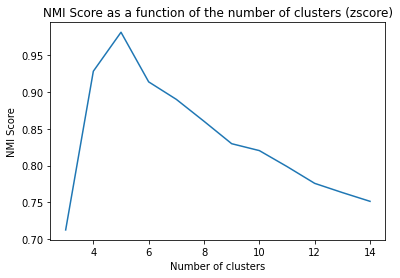

100%|██████████| 12/12 [00:01<00:00, 10.91it/s]


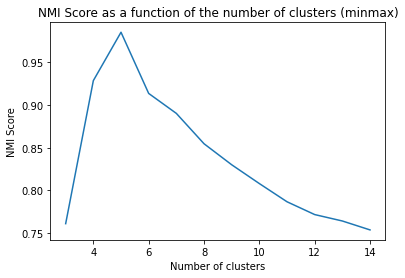

100%|██████████| 12/12 [00:01<00:00, 10.48it/s]


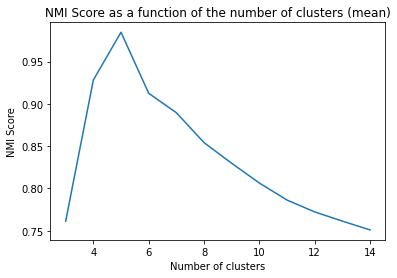

0.9847985624814993 2


In [20]:
best_preds = []
best_score = 0

for genedata_reduced, method in zip(genedatas_reduced_umap, datasets):
    scores = []
    n_clusters = range(3, 15)
    truth = genedata['class'].values - 1
    for k in tqdm(n_clusters):
        preds, km = kmeans(genedata_reduced, k)
        score = nmi(truth, preds, k)
        scores.append(score)
        if score > best_score:
            best_score = score
            best_preds = preds
    plt.plot(n_clusters, scores)
    plt.xlabel("Number of clusters")
    plt.ylabel("NMI Score")
    plt.title("NMI Score as a function of the number of clusters (" + method + ")")
    plt.savefig(f'plots/gene/kmeans_umap_{method}.png')
    plt.show()

    print(max(scores), scores.index(max(scores)))

In [23]:
with open('gene_result.txt', 'w') as f:
    for p in best_preds:
        f.write(f'{p} \n')

## Hierarchical clustering

In [25]:
linkages = ['single', 'complete', 'average']
linkages_func = [sch.single, sch.complete, sch.average]


In [26]:
scores_pca = {}
for d in datasets:
    scores_pca[d] = dict(zip(linkages, [[] for x in range(len(linkages))]))

for genedata_reduced, dataset in zip(genedatas_reduced_pca, datasets):
    n_clusters = range(3, 35)
    truth = genedata['class'].values - 1
    for k in tqdm(n_clusters):
        agglo_func(genedata_reduced, linkages, linkages_func, k, dataset, scores_pca, truth)
        # score = nmi(truth, preds, k)
        # scores.append(score)


100%|██████████| 32/32 [00:15<00:00,  2.12it/s]


In [27]:
scores_umap = {}
for d in datasets:
    scores_umap[d] = dict(zip(linkages, [[] for x in range(len(linkages))]))

for genedata_reduced, dataset in zip(genedatas_reduced_umap, datasets):
    n_clusters = range(3, 35)
    truth = genedata['class'].values - 1
    for k in tqdm(n_clusters):
        agglo_func(genedata_reduced, linkages, linkages_func, k, dataset, scores_umap, truth)
        # score = nmi(truth, preds, k)
        # scores.append(score)


100%|██████████| 32/32 [00:01<00:00, 29.22it/s]


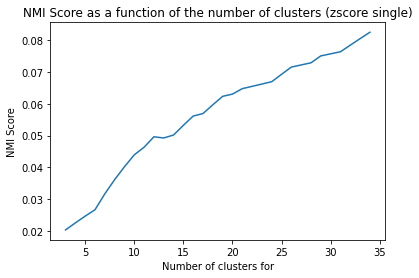

0.08259421841889707


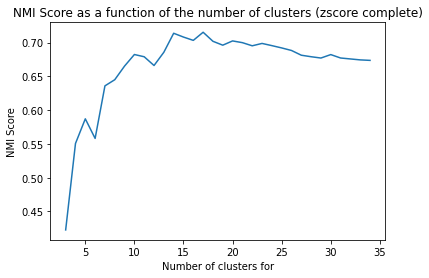

0.7153022406680642


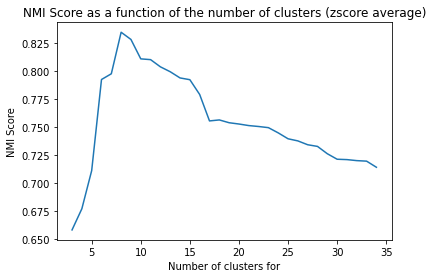

0.8350724856371309


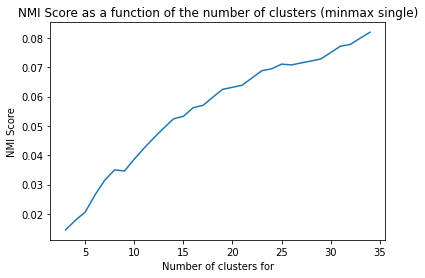

0.08192987953214961


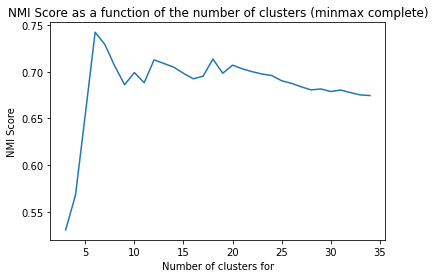

0.7422817113142043


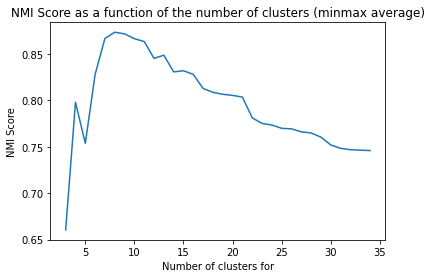

0.8732895668433788


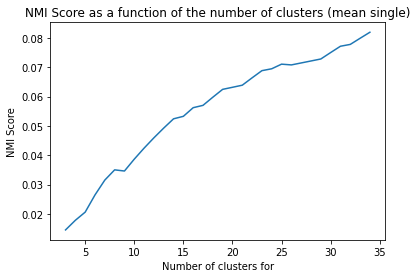

0.08192987953214961


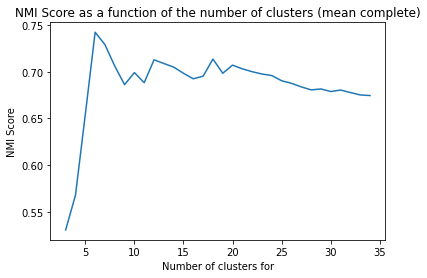

0.7422817113142043


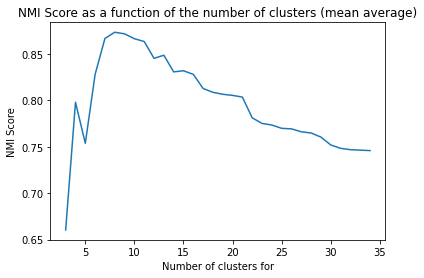

0.8732895668433788


In [28]:

for datas in scores_pca.keys():
    for link in scores_pca[datas].keys():
        score_arr = scores_pca[datas][link]
        plt.plot(n_clusters, score_arr)
        plt.xlabel("Number of clusters for")
        plt.ylabel("NMI Score")
        plt.title(f"NMI Score as a function of the number of clusters ({datas} {link})")
        plt.savefig(f'plots/gene/hier_pca_{datas}_{link}.png')
        plt.show()
        print(max(score_arr))

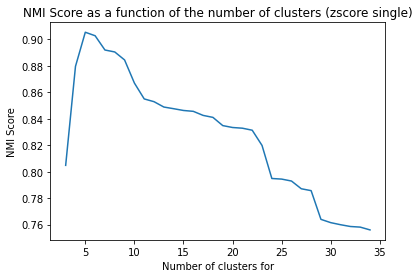

0.9053624442223634


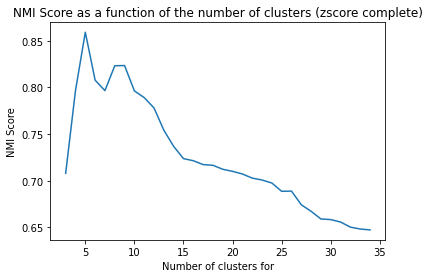

0.8590401089548111


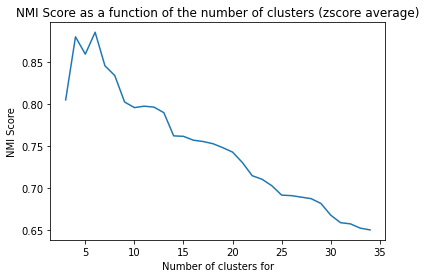

0.8850237558871987


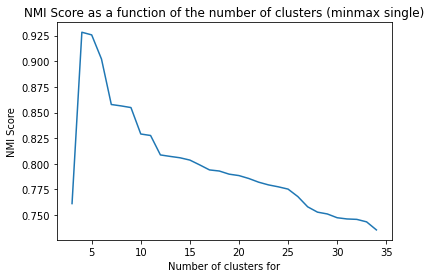

0.9282854524451123


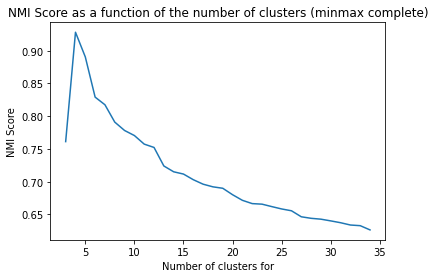

0.9282854524451123


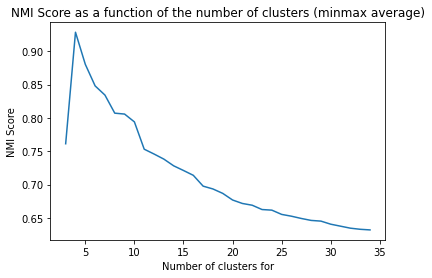

0.9282854524451123


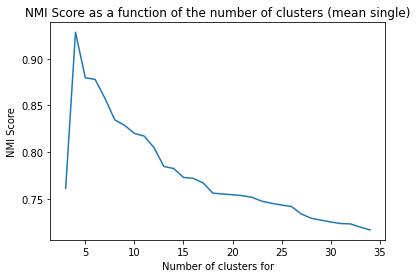

0.9282854524451123


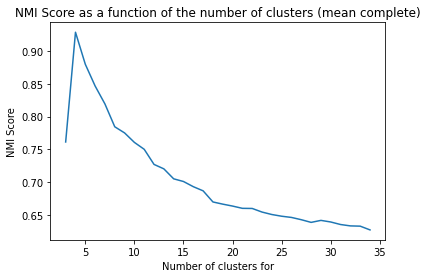

0.9282854524451123


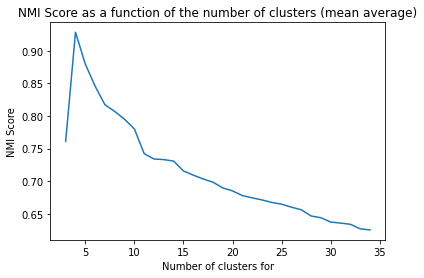

0.9282854524451123


In [29]:

for datas in scores_umap.keys():
    for link in scores_umap[datas].keys():
        score_arr = scores_umap[datas][link]
        plt.plot(n_clusters, score_arr)
        plt.xlabel("Number of clusters for")
        plt.ylabel("NMI Score")
        plt.title(f"NMI Score as a function of the number of clusters ({datas} {link})")
        plt.savefig(f'plots/gene/hier_umap_{datas}_{link}.png')
        plt.show()
        print(max(score_arr))

## Without preprocessing

In [31]:
score_np = {'data': {}}
score_np['data'] = dict(zip(linkages, [[] for x in range(len(linkages))]))
print(score_np)

{'data': {'single': [], 'complete': [], 'average': []}}


In [33]:
for k in tqdm(n_clusters):
    agglo_func(genedata, linkages, linkages_func, k, 'data', score_np, truth)

100%|██████████| 32/32 [02:54<00:00,  5.46s/it]


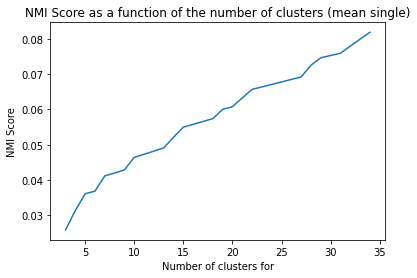

0.0819655231641182


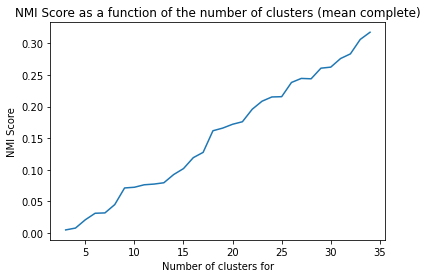

0.31745036877952104


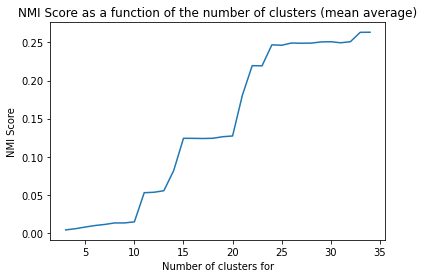

0.2632816699348829


In [34]:
for link in score_np['data'].keys():
    score_arr = score_np['data'][link]
    plt.plot(n_clusters, score_arr)
    plt.xlabel("Number of clusters for")
    plt.ylabel("NMI Score")
    plt.title(f"NMI Score as a function of the number of clusters ({datas} {link})")
    plt.savefig(f'plots/gene/hier_no_prep_{datas}_{link}.png')
    plt.show()
    print(max(score_arr))